### Project objective:
##### The goal of this project is to develop a machine learning model capable of accurately predicting the critical temperature of materials based on their elemental and physical descriptors. 
##### By analyzing a comprehensive dataset of engineered features such as atomic mass, electron affinity, and thermal conductivity, the model aims to identify patterns that govern superconducting behavior and provide insights into material design for advanced technological applications.
##### ------------------------------------------------------------------------------------------
### Model type: Regression
### Topic: Science

In [81]:
#Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [82]:
#Loading the dataset
df=pd.read_csv(r"C:\Users\user\Dropbox\DSML-CapstoneProject\superconductivty+data\train.csv")

In [83]:
#Viewing the data
df

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp
0,4,88.944468,57.862692,66.361592,36.116612,1.181795,1.062396,122.90607,31.794921,51.968828,...,2.257143,2.213364,2.219783,1.368922,1.066221,1,1.085714,0.433013,0.437059,29.00
1,5,92.729214,58.518416,73.132787,36.396602,1.449309,1.057755,122.90607,36.161939,47.094633,...,2.257143,1.888175,2.210679,1.557113,1.047221,2,1.128571,0.632456,0.468606,26.00
2,4,88.944468,57.885242,66.361592,36.122509,1.181795,0.975980,122.90607,35.741099,51.968828,...,2.271429,2.213364,2.232679,1.368922,1.029175,1,1.114286,0.433013,0.444697,19.00
3,4,88.944468,57.873967,66.361592,36.119560,1.181795,1.022291,122.90607,33.768010,51.968828,...,2.264286,2.213364,2.226222,1.368922,1.048834,1,1.100000,0.433013,0.440952,22.00
4,4,88.944468,57.840143,66.361592,36.110716,1.181795,1.129224,122.90607,27.848743,51.968828,...,2.242857,2.213364,2.206963,1.368922,1.096052,1,1.057143,0.433013,0.428809,23.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21258,4,106.957877,53.095769,82.515384,43.135565,1.177145,1.254119,146.88130,15.504479,65.764081,...,3.555556,3.223710,3.519911,1.377820,0.913658,1,2.168889,0.433013,0.496904,2.44
21259,5,92.266740,49.021367,64.812662,32.867748,1.323287,1.571630,188.38390,7.353333,69.232655,...,2.047619,2.168944,2.038991,1.594167,1.337246,1,0.904762,0.400000,0.212959,122.10
21260,2,99.663190,95.609104,99.433882,95.464320,0.690847,0.530198,13.51362,53.041104,6.756810,...,4.800000,4.472136,4.781762,0.686962,0.450561,1,3.200000,0.500000,0.400000,1.98
21261,2,99.663190,97.095602,99.433882,96.901083,0.690847,0.640883,13.51362,31.115202,6.756810,...,4.690000,4.472136,4.665819,0.686962,0.577601,1,2.210000,0.500000,0.462493,1.84


In [84]:
#Description of the dataset
df.describe()

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp
count,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,...,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000
mean,4.115224,87.557631,72.988310,71.290627,58.539916,1.165608,1.063884,115.601251,33.225218,44.391893,...,3.153127,3.056536,3.055885,1.295682,1.052841,2.041010,1.483007,0.839342,0.673987,34.421219
std,1.439295,29.676497,33.490406,31.030272,36.651067,0.364930,0.401423,54.626887,26.967752,20.035430,...,1.191249,1.046257,1.174815,0.393155,0.380291,1.242345,0.978176,0.484676,0.455580,34.254362
min,1.000000,6.941000,6.423452,5.320573,1.960849,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000210
25%,3.000000,72.458076,52.143839,58.041225,35.248990,0.966676,0.775363,78.512902,16.824174,32.890369,...,2.116732,2.279705,2.091251,1.060857,0.775678,1.000000,0.921454,0.451754,0.306892,5.365000
50%,4.000000,84.922750,60.696571,66.361592,39.918385,1.199541,1.146783,122.906070,26.636008,45.123500,...,2.618182,2.615321,2.434057,1.368922,1.166532,2.000000,1.063077,0.800000,0.500000,20.000000
75%,5.000000,100.404410,86.103540,78.116681,73.113234,1.444537,1.359418,154.119320,38.356908,59.322812,...,4.026201,3.727919,3.914868,1.589027,1.330801,3.000000,1.918400,1.200000,1.020436,63.000000
max,9.000000,208.980400,208.980400,208.980400,208.980400,1.983797,1.958203,207.972460,205.589910,101.019700,...,7.000000,7.000000,7.000000,2.141963,1.949739,6.000000,6.992200,3.000000,3.000000,185.000000


In [85]:
#Searching for null entries
df.isnull().sum()

number_of_elements       0
mean_atomic_mass         0
wtd_mean_atomic_mass     0
gmean_atomic_mass        0
wtd_gmean_atomic_mass    0
                        ..
range_Valence            0
wtd_range_Valence        0
std_Valence              0
wtd_std_Valence          0
critical_temp            0
Length: 82, dtype: int64

In [86]:
#Gather information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21263 entries, 0 to 21262
Data columns (total 82 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   number_of_elements               21263 non-null  int64  
 1   mean_atomic_mass                 21263 non-null  float64
 2   wtd_mean_atomic_mass             21263 non-null  float64
 3   gmean_atomic_mass                21263 non-null  float64
 4   wtd_gmean_atomic_mass            21263 non-null  float64
 5   entropy_atomic_mass              21263 non-null  float64
 6   wtd_entropy_atomic_mass          21263 non-null  float64
 7   range_atomic_mass                21263 non-null  float64
 8   wtd_range_atomic_mass            21263 non-null  float64
 9   std_atomic_mass                  21263 non-null  float64
 10  wtd_std_atomic_mass              21263 non-null  float64
 11  mean_fie                         21263 non-null  float64
 12  wtd_mean_fie      

In [87]:
#View the columns
df.columns

Index(['number_of_elements', 'mean_atomic_mass', 'wtd_mean_atomic_mass',
       'gmean_atomic_mass', 'wtd_gmean_atomic_mass', 'entropy_atomic_mass',
       'wtd_entropy_atomic_mass', 'range_atomic_mass', 'wtd_range_atomic_mass',
       'std_atomic_mass', 'wtd_std_atomic_mass', 'mean_fie', 'wtd_mean_fie',
       'gmean_fie', 'wtd_gmean_fie', 'entropy_fie', 'wtd_entropy_fie',
       'range_fie', 'wtd_range_fie', 'std_fie', 'wtd_std_fie',
       'mean_atomic_radius', 'wtd_mean_atomic_radius', 'gmean_atomic_radius',
       'wtd_gmean_atomic_radius', 'entropy_atomic_radius',
       'wtd_entropy_atomic_radius', 'range_atomic_radius',
       'wtd_range_atomic_radius', 'std_atomic_radius', 'wtd_std_atomic_radius',
       'mean_Density', 'wtd_mean_Density', 'gmean_Density',
       'wtd_gmean_Density', 'entropy_Density', 'wtd_entropy_Density',
       'range_Density', 'wtd_range_Density', 'std_Density', 'wtd_std_Density',
       'mean_ElectronAffinity', 'wtd_mean_ElectronAffinity',
       'gmean_

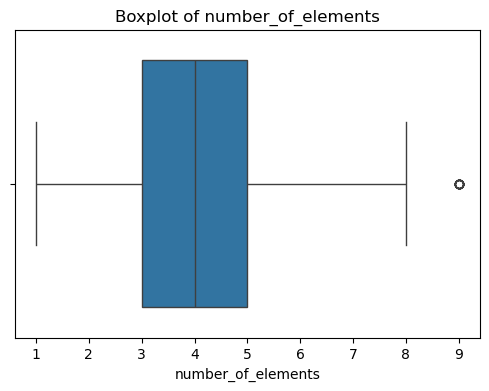

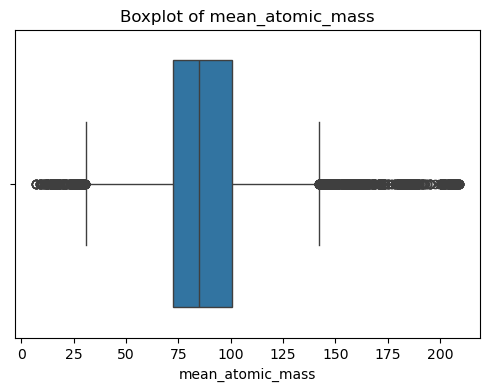

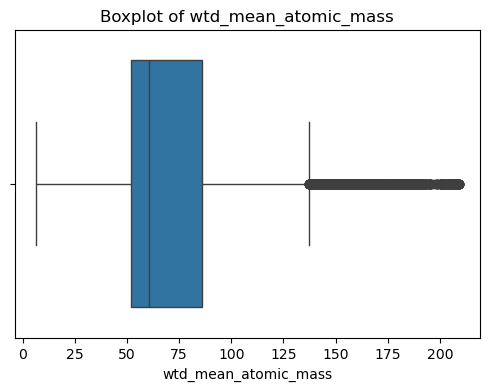

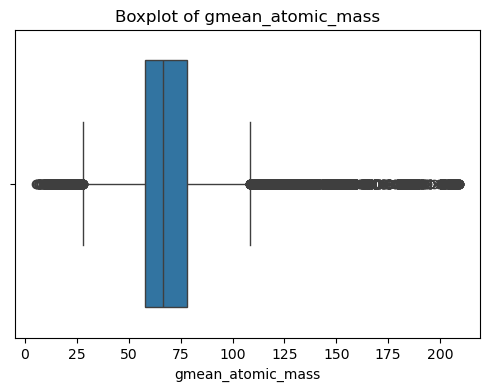

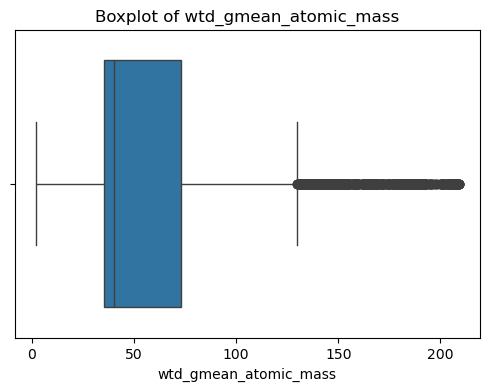

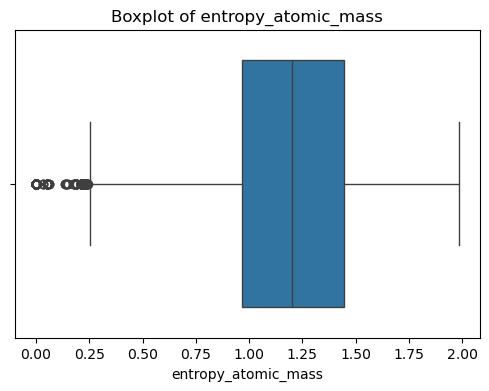

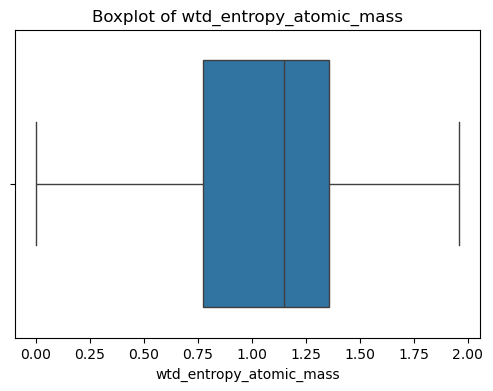

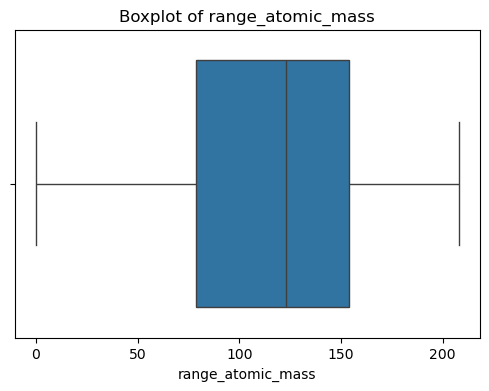

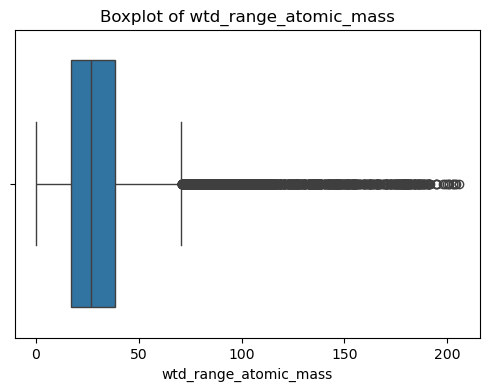

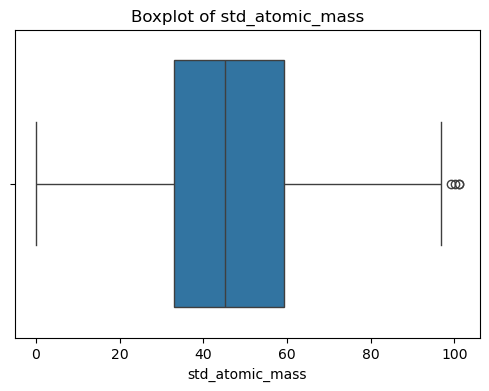

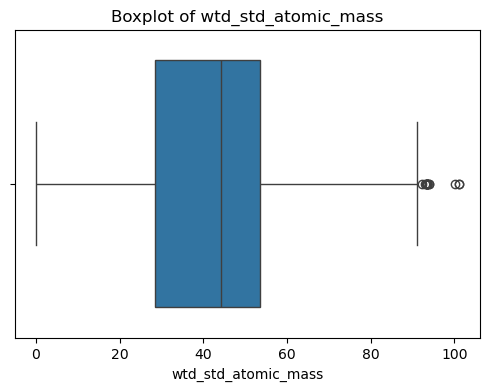

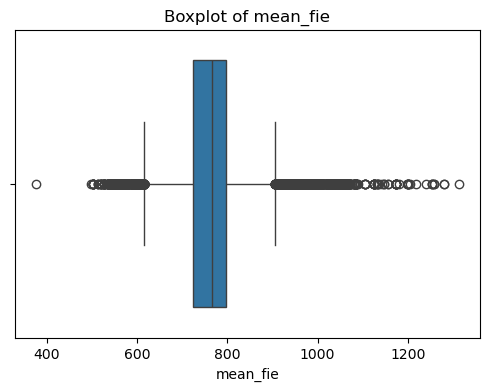

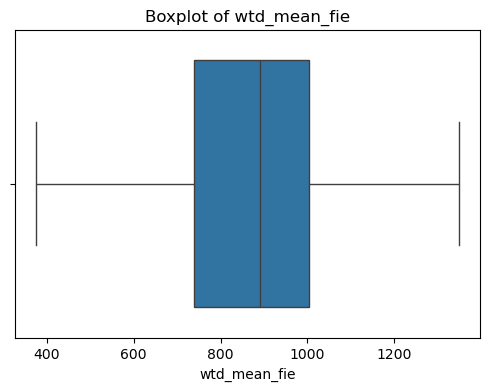

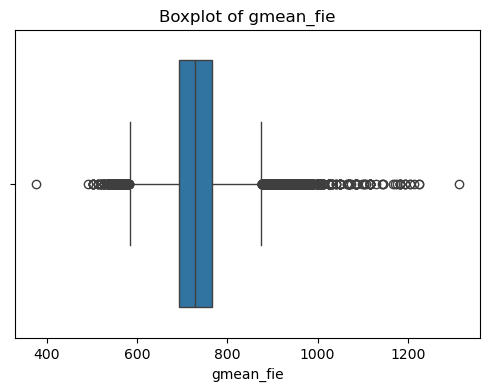

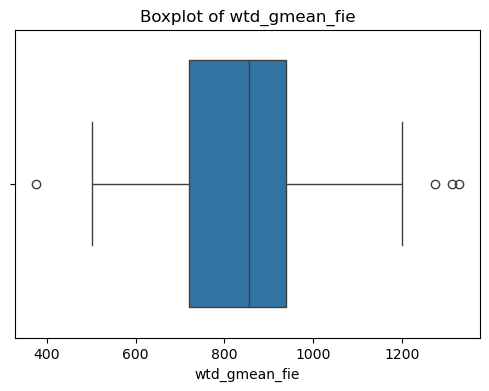

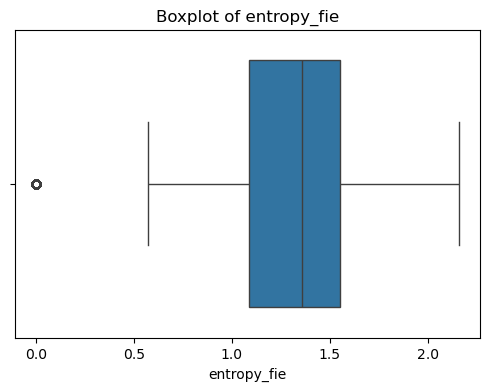

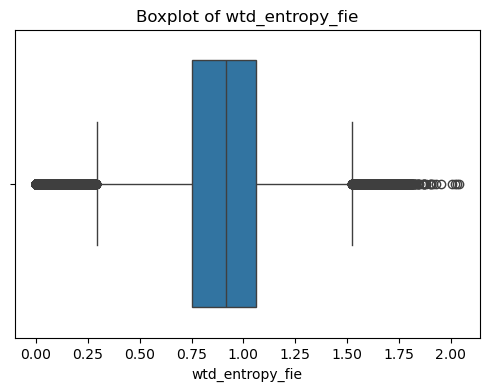

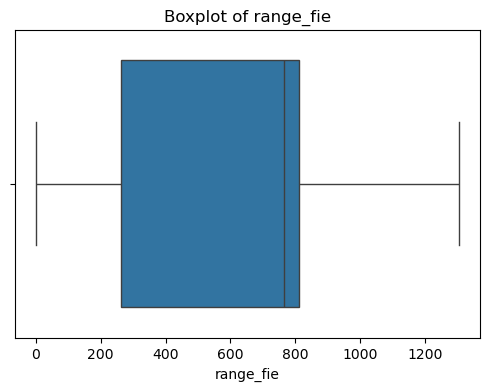

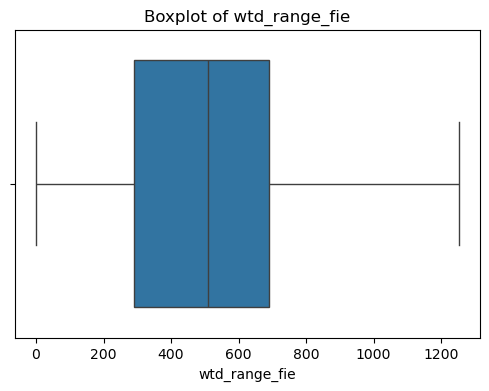

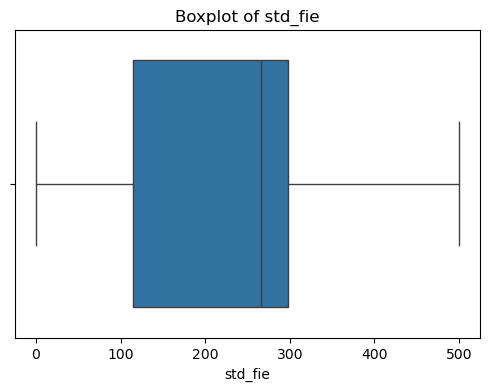

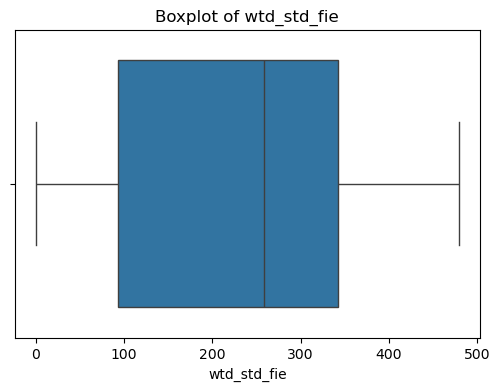

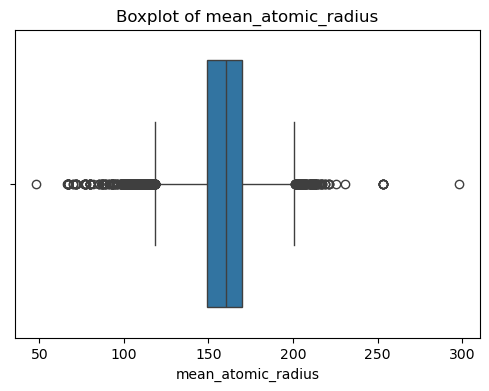

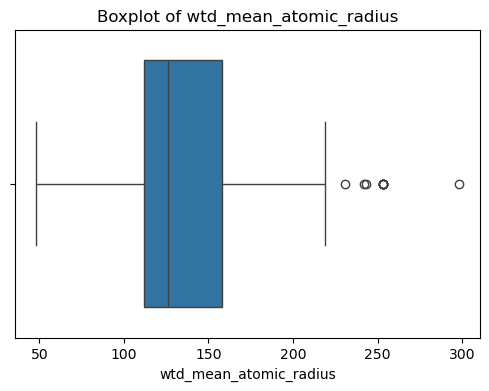

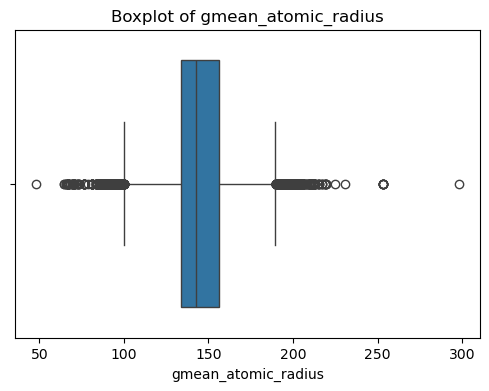

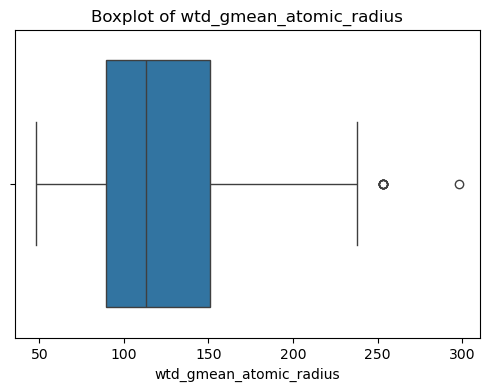

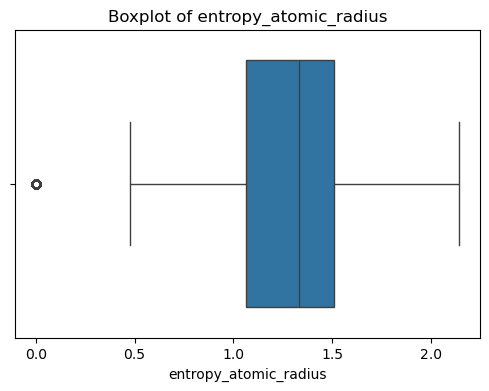

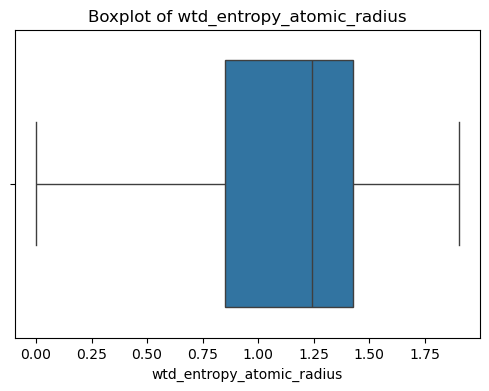

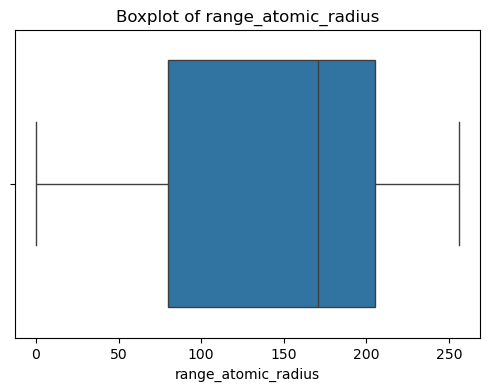

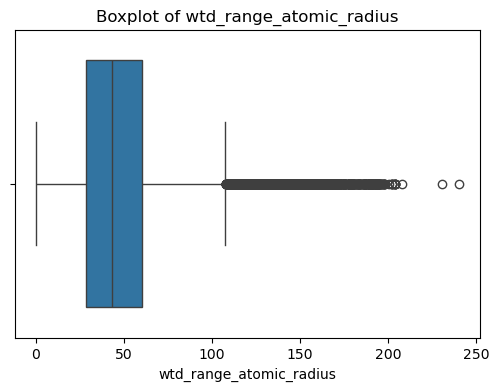

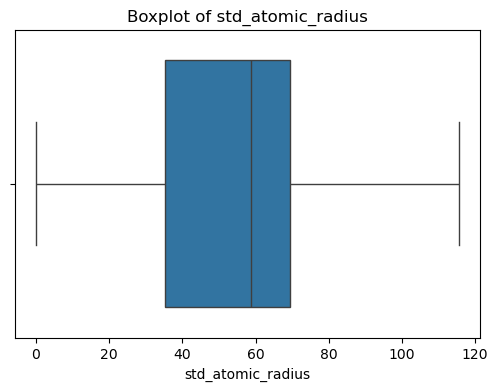

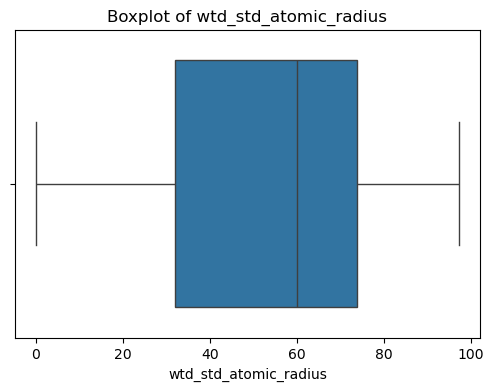

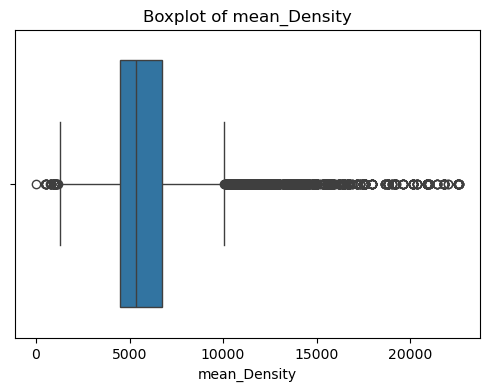

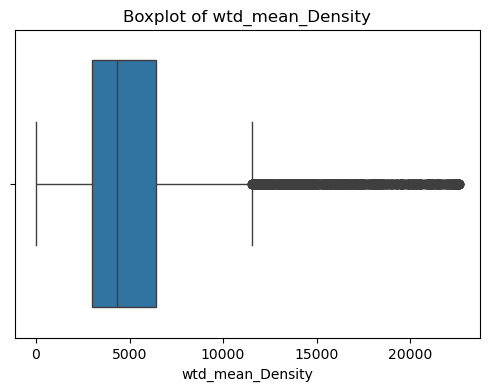

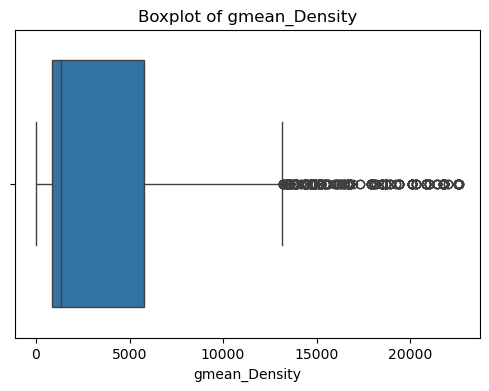

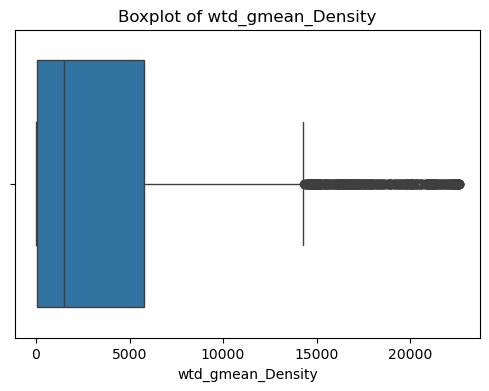

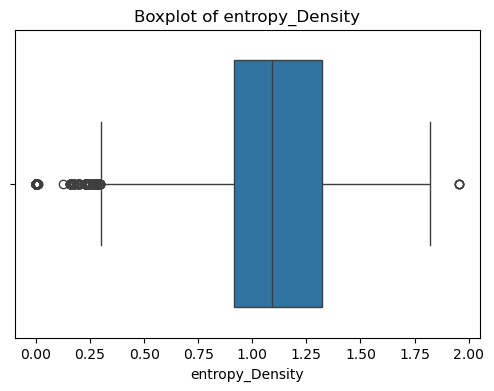

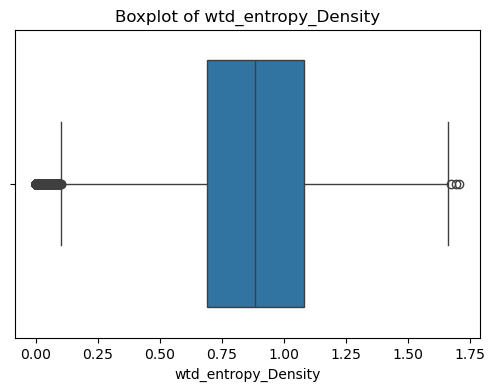

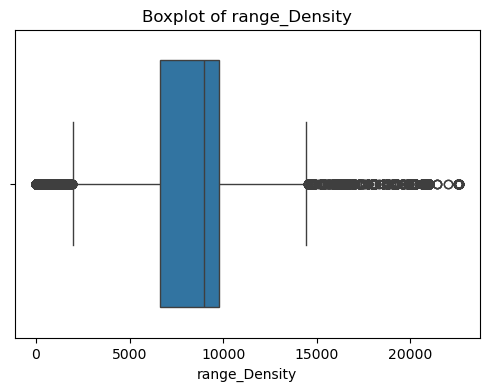

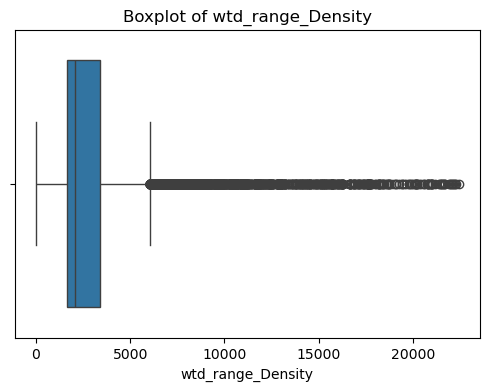

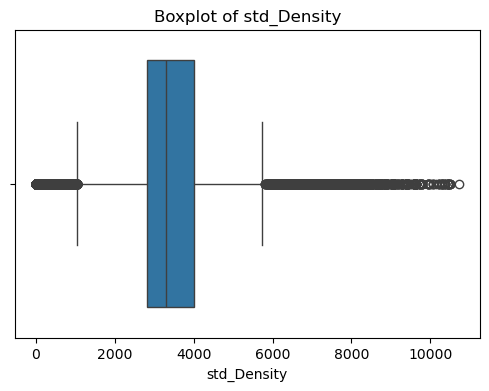

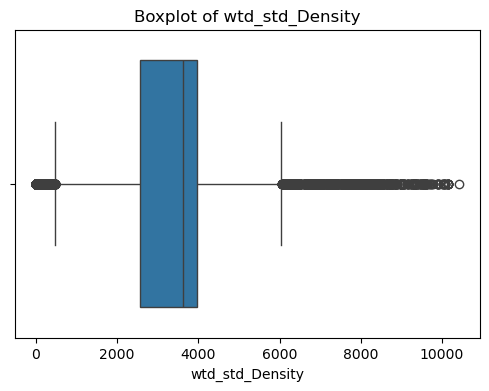

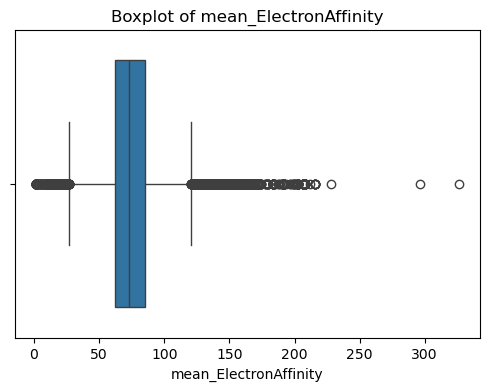

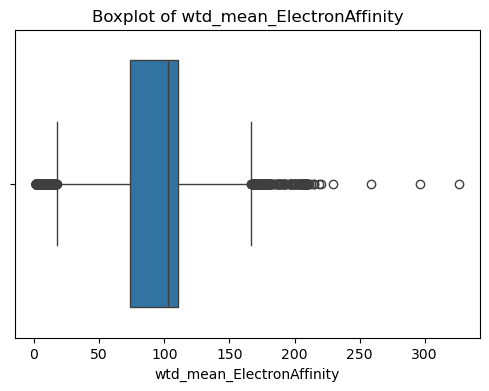

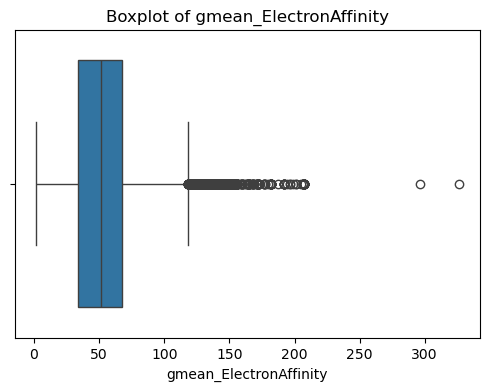

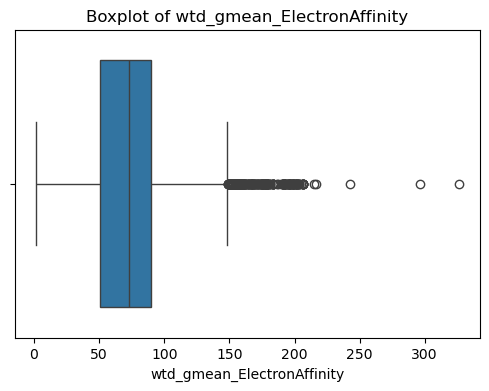

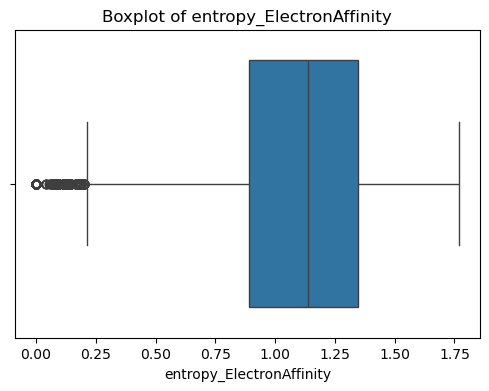

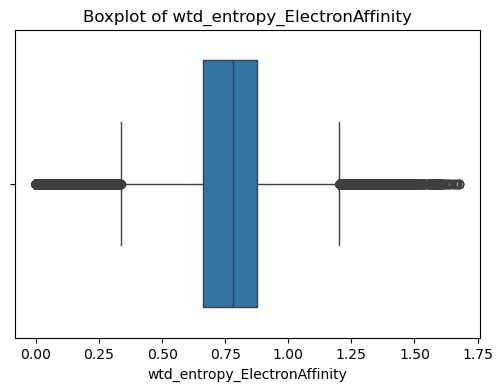

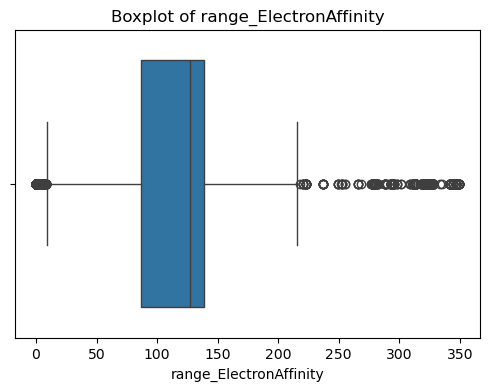

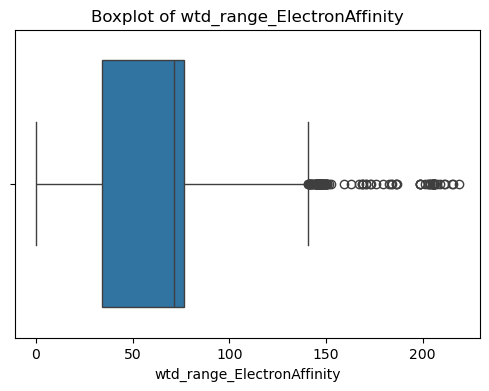

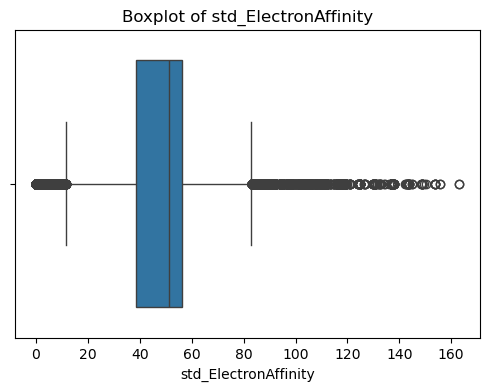

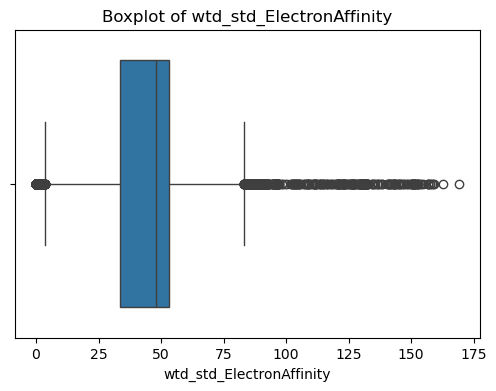

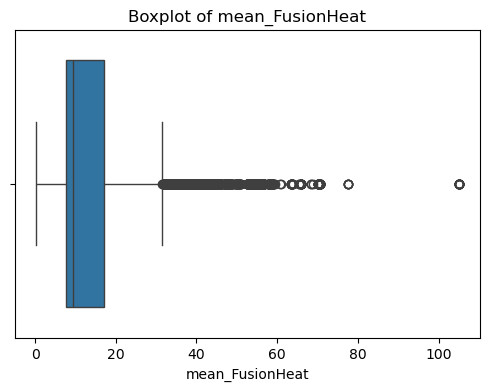

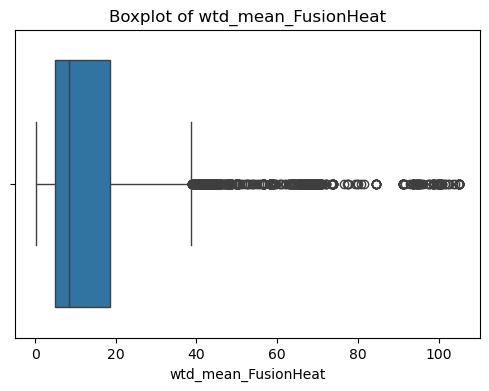

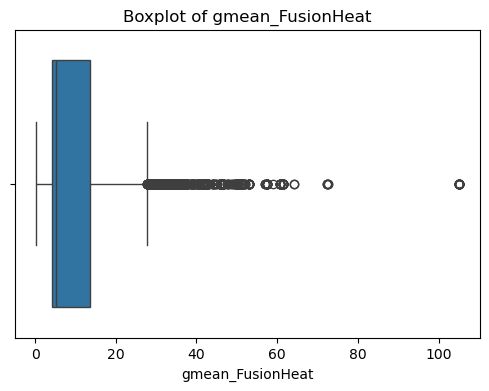

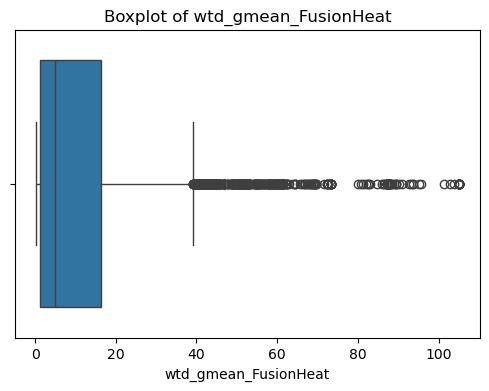

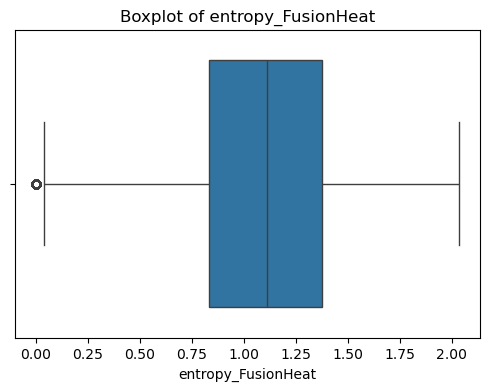

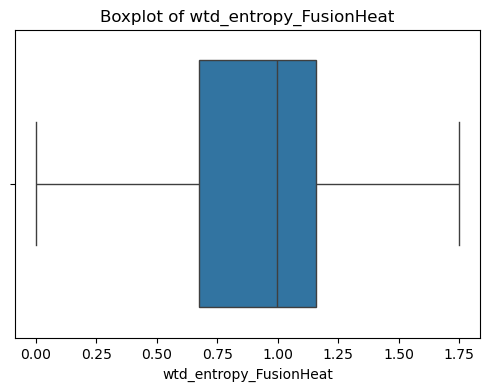

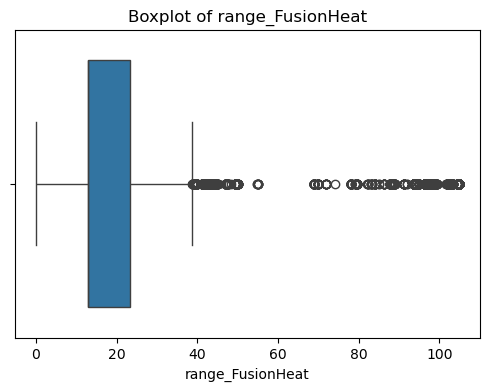

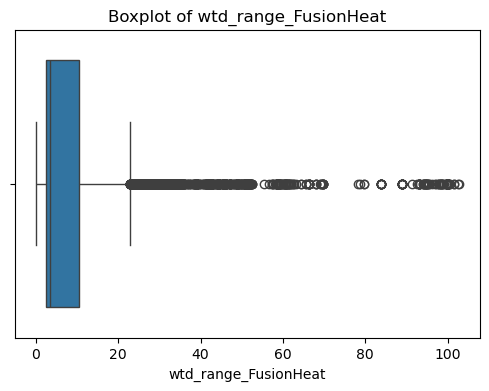

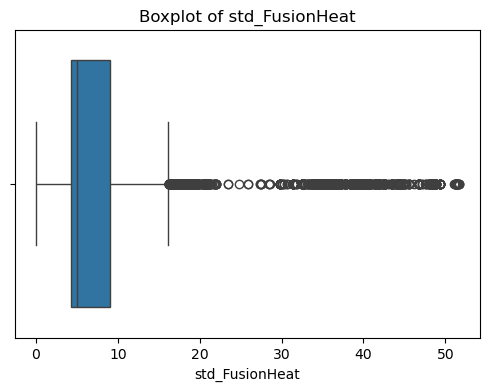

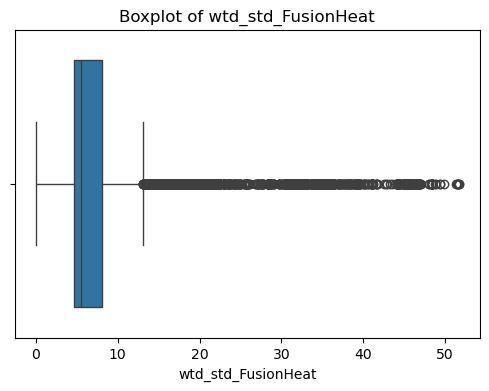

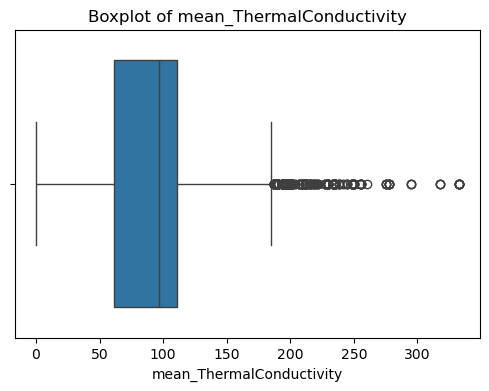

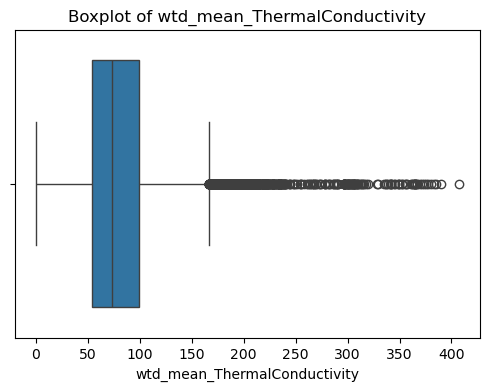

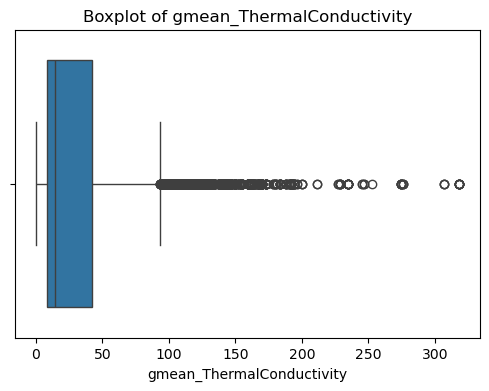

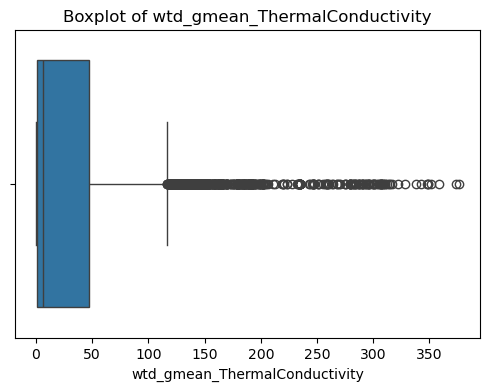

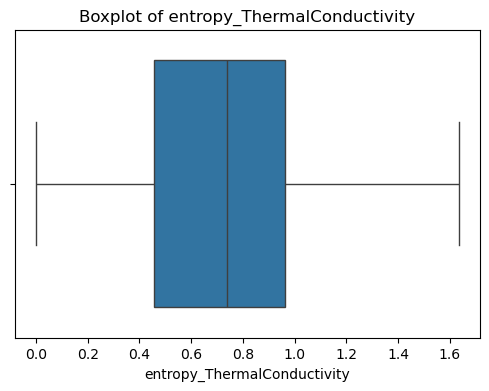

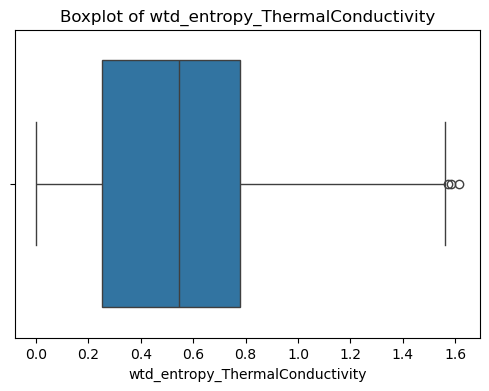

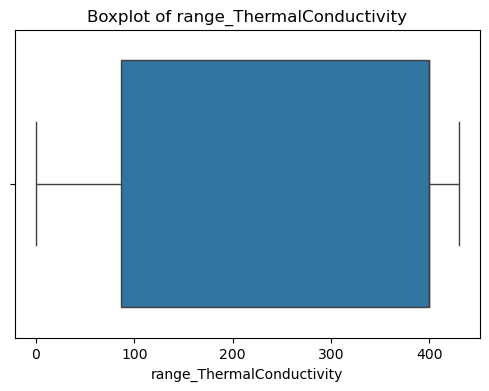

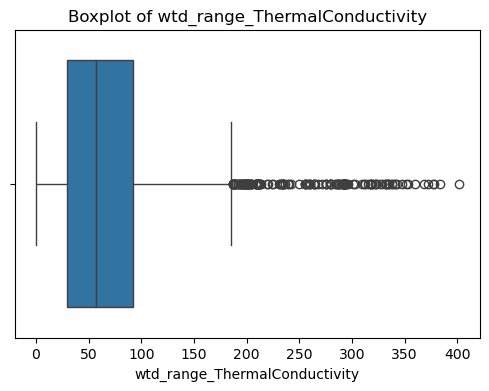

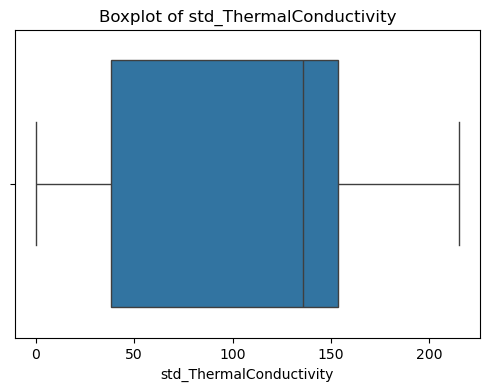

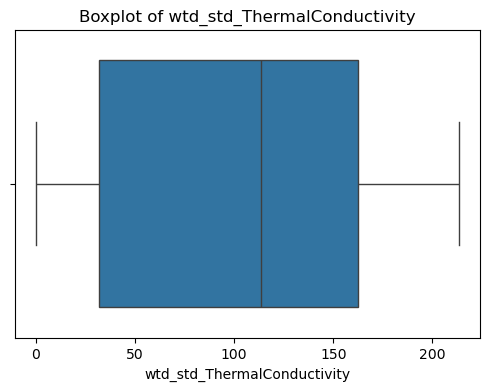

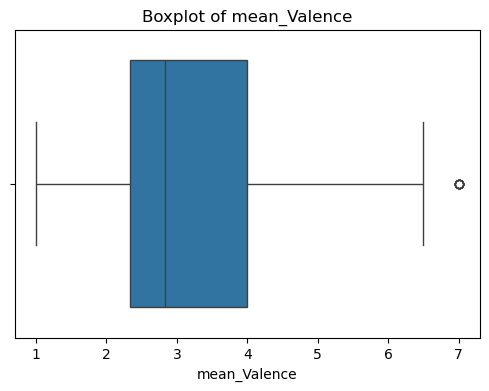

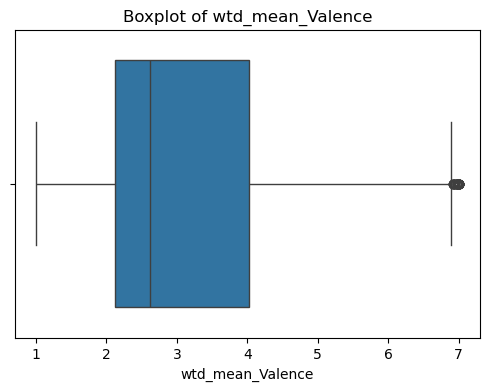

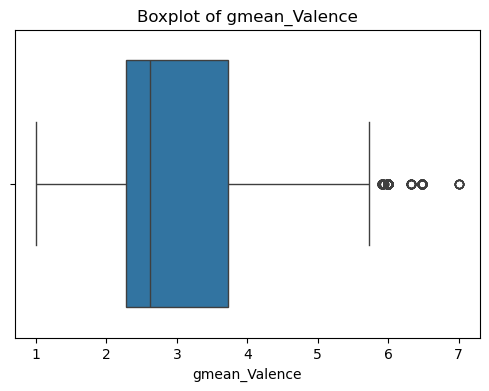

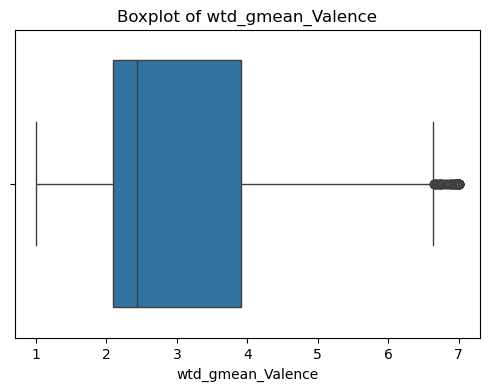

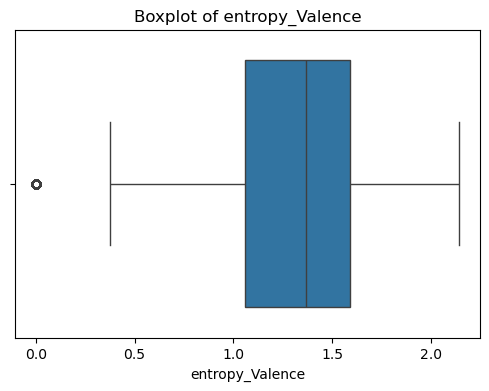

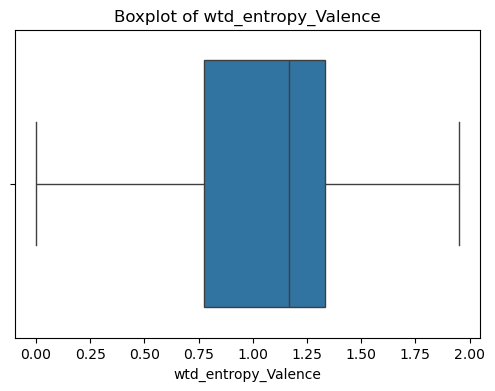

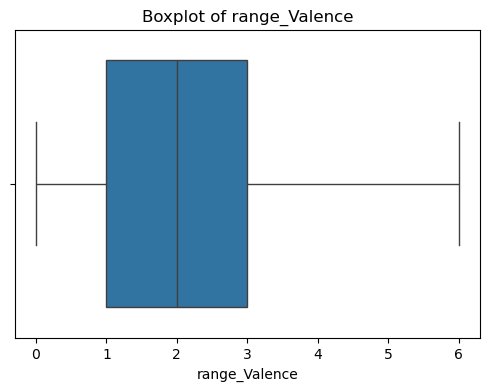

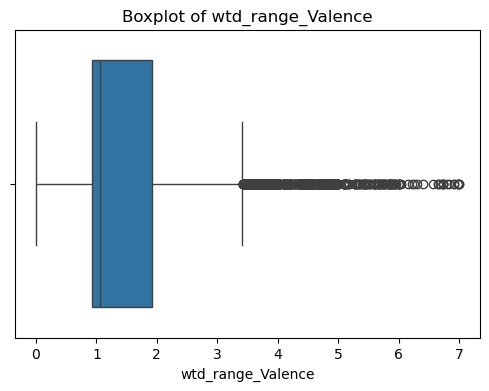

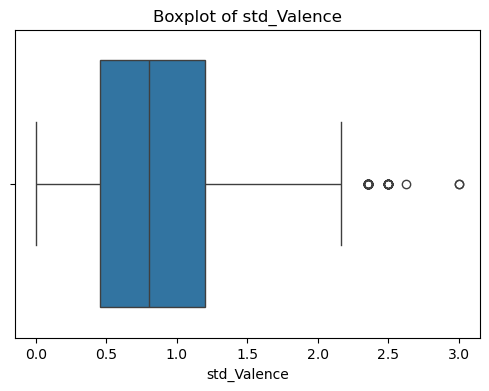

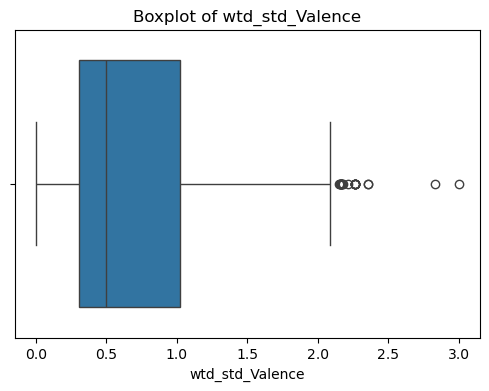

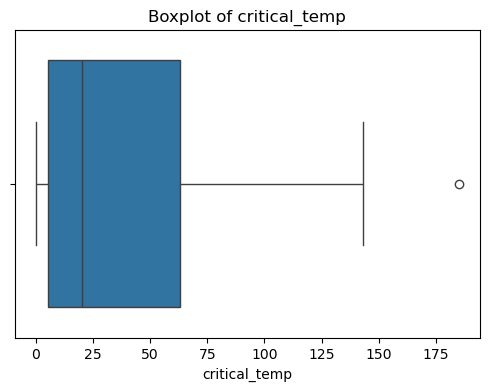

In [88]:
#Detect outliers
num_columns = df.select_dtypes(include=['number']).columns
for col in num_columns:
    plt.figure(figsize=(6, 4))
    sns.boxplot(data=df, x=col)
    plt.title(f'Boxplot of {col}')
    plt.show()

In [89]:
#Find the correlation
corr_series = df.corr(numeric_only=True)['critical_temp'].sort_values(ascending=False)

In [90]:
corr_series

critical_temp                  1.000000
wtd_std_ThermalConductivity    0.721271
range_ThermalConductivity      0.687654
range_atomic_radius            0.653759
std_ThermalConductivity        0.653632
                                 ...   
gmean_Density                 -0.541684
gmean_Valence                 -0.573068
mean_Valence                  -0.600085
wtd_gmean_Valence             -0.615653
wtd_mean_Valence              -0.632401
Name: critical_temp, Length: 82, dtype: float64

In [91]:
df.corr()

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp
number_of_elements,1.000000,-0.141923,-0.353064,-0.292969,-0.454525,0.939304,0.881845,0.682777,-0.320293,0.513998,...,-0.648551,-0.618512,-0.659268,0.967832,0.892559,0.231874,-0.447770,0.105365,0.035216,0.601069
mean_atomic_mass,-0.141923,1.000000,0.815977,0.940298,0.745841,-0.104000,-0.097609,0.125659,0.446225,0.196460,...,0.304683,0.392153,0.321399,-0.156786,-0.145610,-0.107450,0.168633,-0.080279,-0.081253,-0.113523
wtd_mean_atomic_mass,-0.353064,0.815977,1.000000,0.848242,0.964085,-0.308046,-0.412666,-0.144029,0.716623,-0.060739,...,0.545587,0.539780,0.548981,-0.375718,-0.331025,-0.039155,0.330904,-0.003681,0.077323,-0.312272
gmean_atomic_mass,-0.292969,0.940298,0.848242,1.000000,0.856975,-0.190214,-0.232183,-0.175861,0.458473,-0.121708,...,0.427961,0.511508,0.450357,-0.306246,-0.307662,-0.165010,0.272303,-0.124627,-0.117336,-0.230345
wtd_gmean_atomic_mass,-0.454525,0.745841,0.964085,0.856975,1.000000,-0.370561,-0.484664,-0.352093,0.673326,-0.274487,...,0.614100,0.608417,0.623261,-0.477785,-0.448072,-0.078641,0.409674,-0.033313,0.030361,-0.369858
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
range_Valence,0.231874,-0.107450,-0.039155,-0.165010,-0.078641,0.203207,0.161350,0.208861,0.023251,0.192347,...,0.111249,-0.041651,0.033007,0.155410,0.204411,1.000000,0.114000,0.973788,0.867393,-0.143546
wtd_range_Valence,-0.447770,0.168633,0.330904,0.272303,0.409674,-0.350047,-0.546910,-0.365395,0.594214,-0.273598,...,0.683700,0.532805,0.681415,-0.417283,-0.639818,0.114000,1.000000,0.184380,0.132162,-0.439901
std_Valence,0.105365,-0.080279,-0.003681,-0.124627,-0.033313,0.087838,0.056309,0.134676,0.066739,0.144106,...,0.186270,0.034589,0.108469,0.034580,0.089774,0.973788,0.184380,1.000000,0.885856,-0.208072
wtd_std_Valence,0.035216,-0.081253,0.077323,-0.117336,0.030361,0.018758,-0.006937,0.102634,0.092819,0.122547,...,0.258593,0.088388,0.168962,-0.017031,0.081284,0.867393,0.132162,0.885856,1.000000,-0.300028


In [92]:
corr_val = df.corr(numeric_only=True)['critical_temp'].abs()

In [93]:
#Finding the signifiicant columns that affect the target variable
significant_col = corr_val[corr_val >= 0.4].drop('critical_temp').index.tolist()

In [94]:
significant_col

['number_of_elements',
 'entropy_atomic_mass',
 'wtd_entropy_atomic_mass',
 'range_atomic_mass',
 'entropy_fie',
 'range_fie',
 'std_fie',
 'wtd_std_fie',
 'wtd_gmean_atomic_radius',
 'entropy_atomic_radius',
 'wtd_entropy_atomic_radius',
 'range_atomic_radius',
 'std_atomic_radius',
 'wtd_std_atomic_radius',
 'wtd_mean_Density',
 'gmean_Density',
 'wtd_gmean_Density',
 'entropy_Density',
 'wtd_entropy_Density',
 'entropy_ElectronAffinity',
 'gmean_FusionHeat',
 'wtd_gmean_FusionHeat',
 'entropy_FusionHeat',
 'wtd_entropy_FusionHeat',
 'range_ThermalConductivity',
 'wtd_range_ThermalConductivity',
 'std_ThermalConductivity',
 'wtd_std_ThermalConductivity',
 'mean_Valence',
 'wtd_mean_Valence',
 'gmean_Valence',
 'wtd_gmean_Valence',
 'entropy_Valence',
 'wtd_entropy_Valence',
 'wtd_range_Valence']

In [95]:
#Capping the significant features | Function declaration
def cap_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    # Apply capping
    df[column] = df[column].apply(lambda x: lower if x < lower else (upper if x > upper else x))
    return df

In [96]:
#Apply capping operation
df_capped = df.copy()
for col in significant_col:
    df_capped = cap_outliers_iqr(df_capped, col)

In [97]:
significant_col

['number_of_elements',
 'entropy_atomic_mass',
 'wtd_entropy_atomic_mass',
 'range_atomic_mass',
 'entropy_fie',
 'range_fie',
 'std_fie',
 'wtd_std_fie',
 'wtd_gmean_atomic_radius',
 'entropy_atomic_radius',
 'wtd_entropy_atomic_radius',
 'range_atomic_radius',
 'std_atomic_radius',
 'wtd_std_atomic_radius',
 'wtd_mean_Density',
 'gmean_Density',
 'wtd_gmean_Density',
 'entropy_Density',
 'wtd_entropy_Density',
 'entropy_ElectronAffinity',
 'gmean_FusionHeat',
 'wtd_gmean_FusionHeat',
 'entropy_FusionHeat',
 'wtd_entropy_FusionHeat',
 'range_ThermalConductivity',
 'wtd_range_ThermalConductivity',
 'std_ThermalConductivity',
 'wtd_std_ThermalConductivity',
 'mean_Valence',
 'wtd_mean_Valence',
 'gmean_Valence',
 'wtd_gmean_Valence',
 'entropy_Valence',
 'wtd_entropy_Valence',
 'wtd_range_Valence']

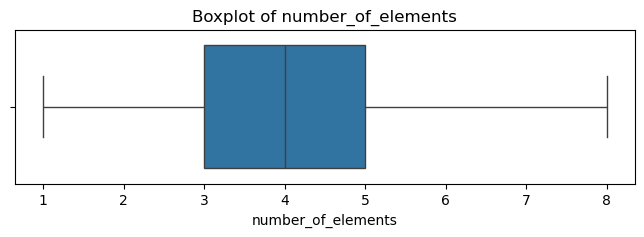

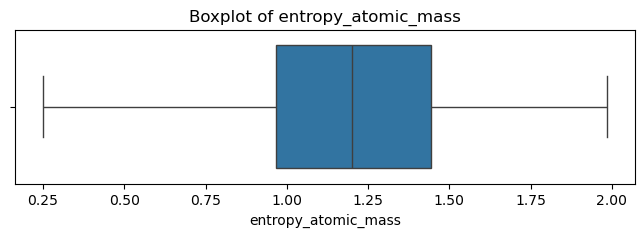

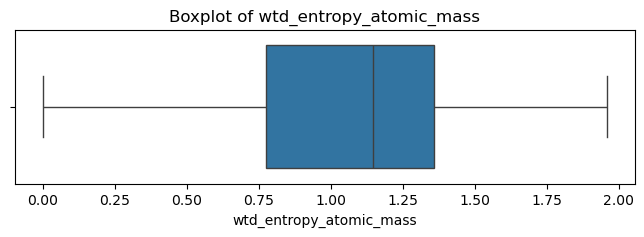

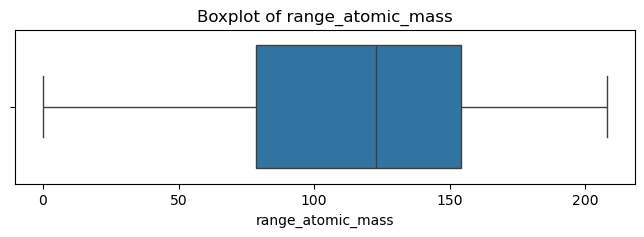

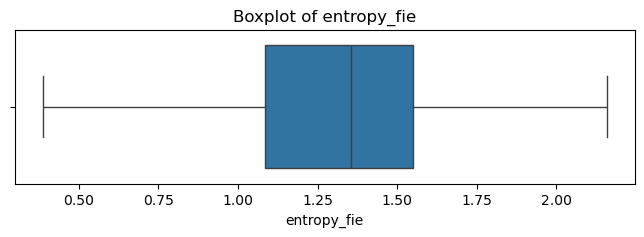

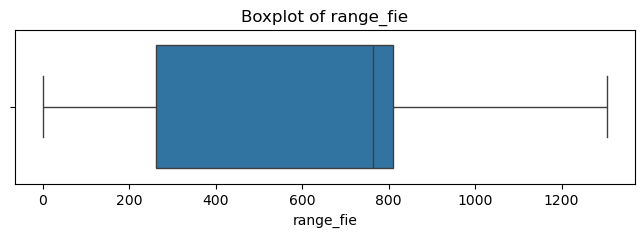

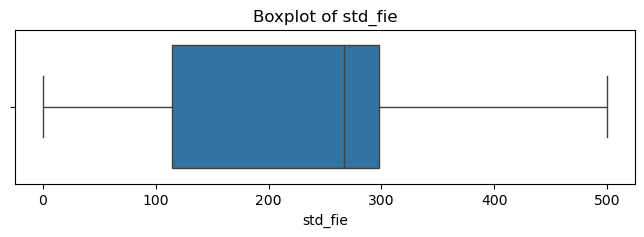

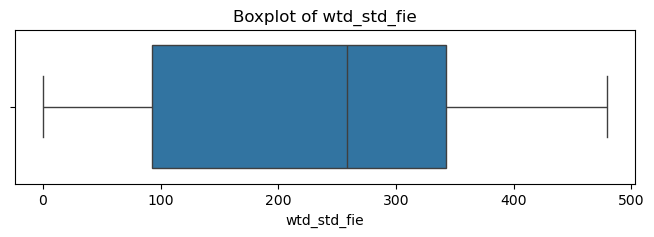

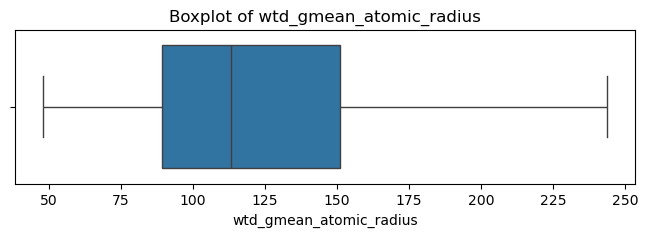

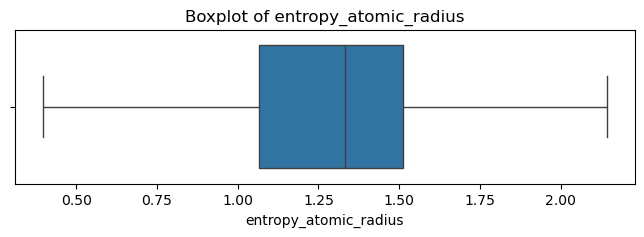

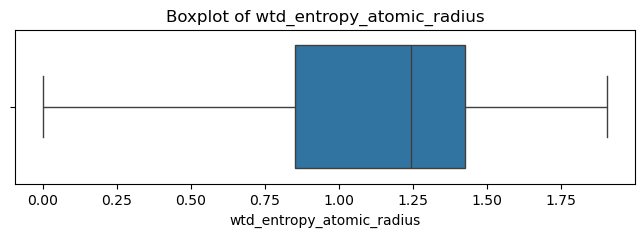

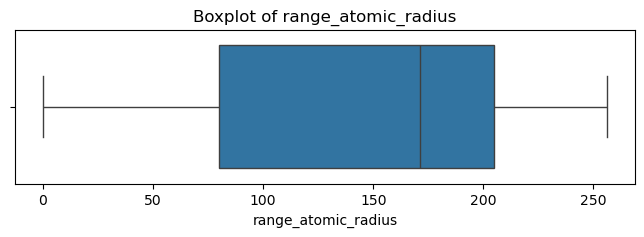

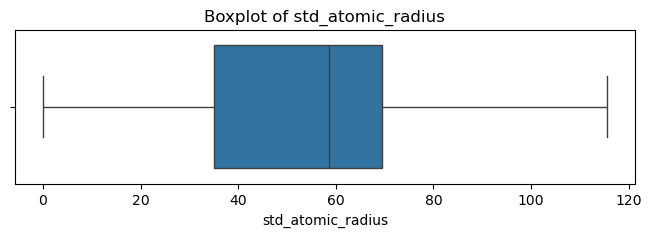

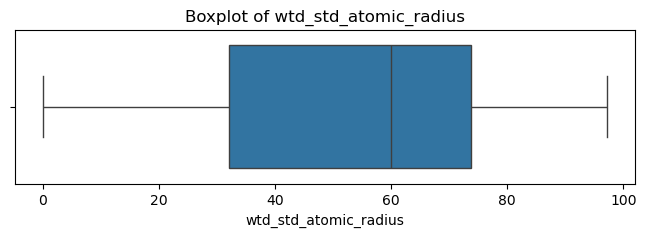

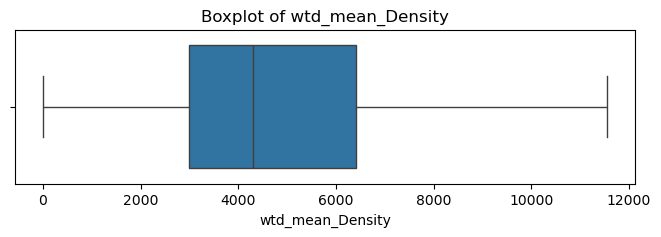

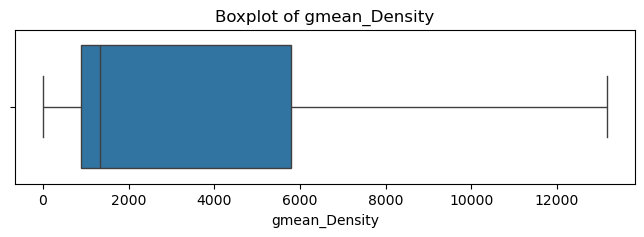

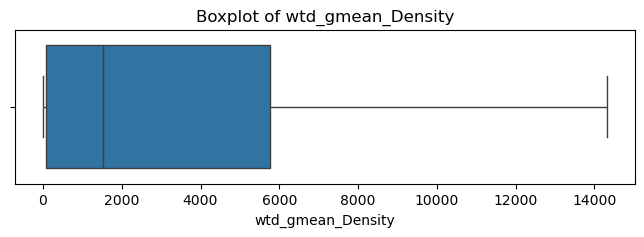

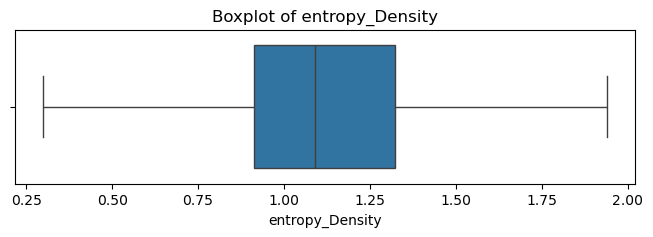

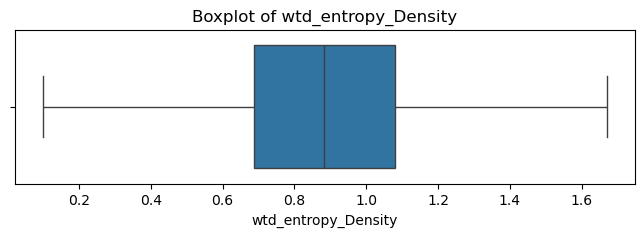

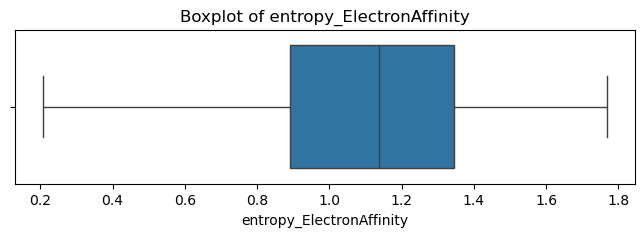

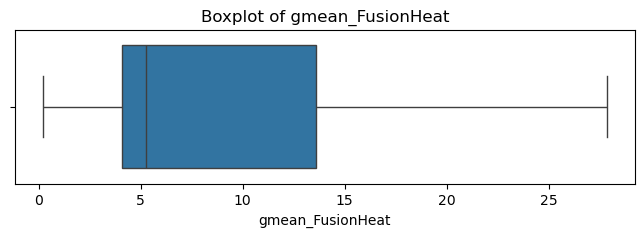

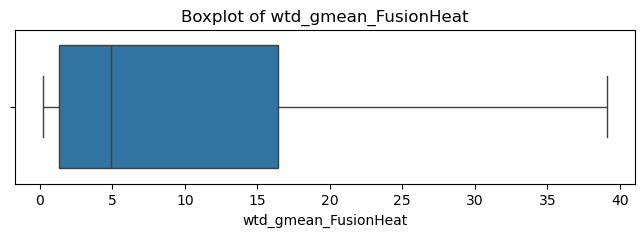

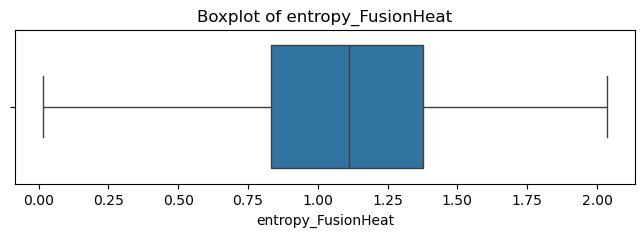

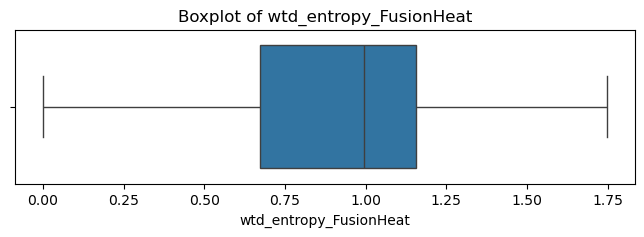

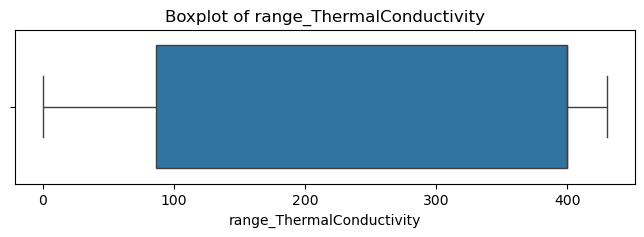

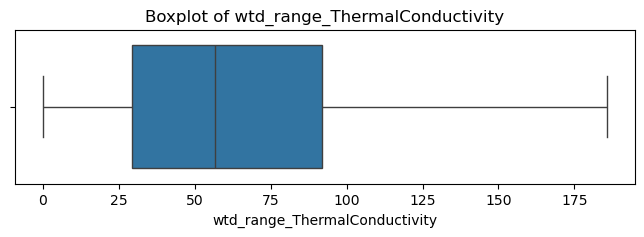

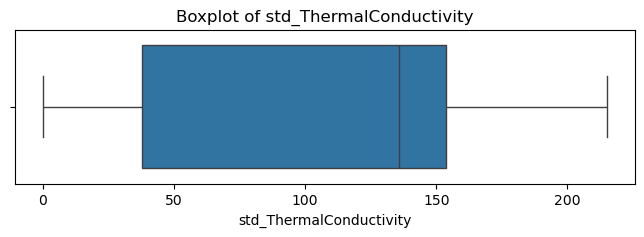

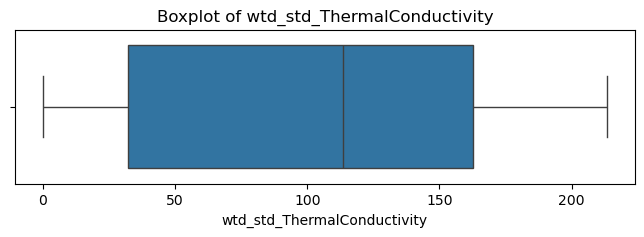

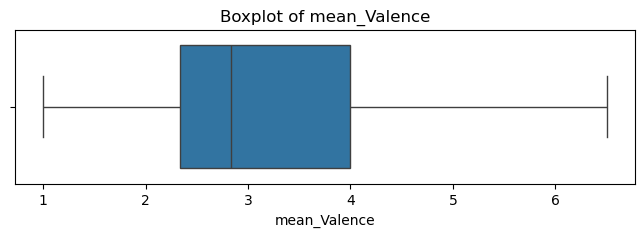

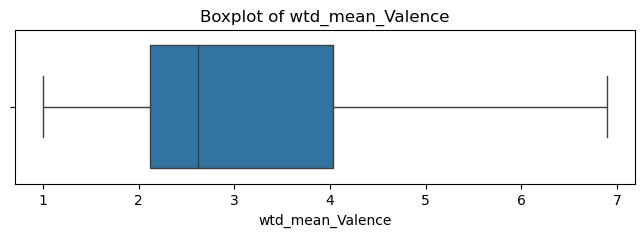

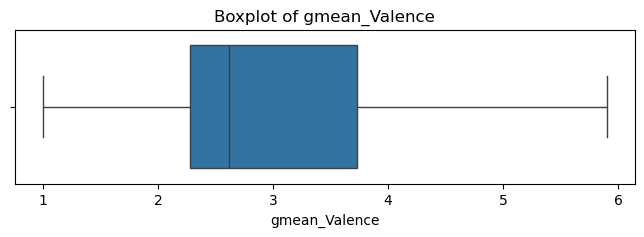

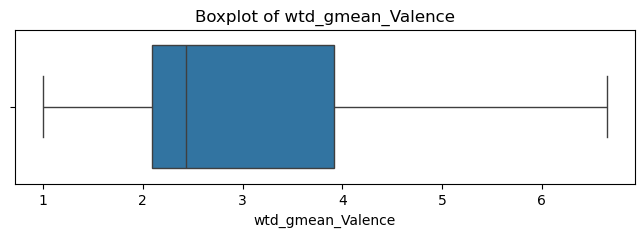

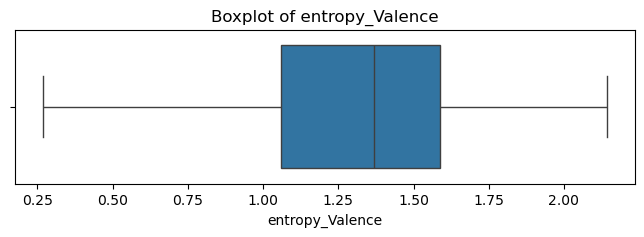

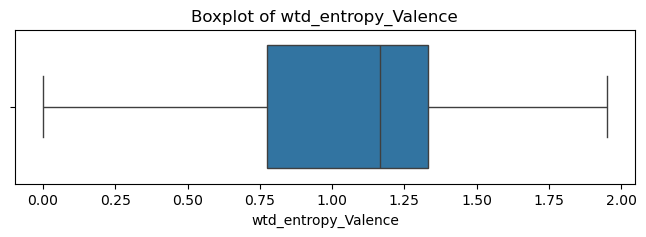

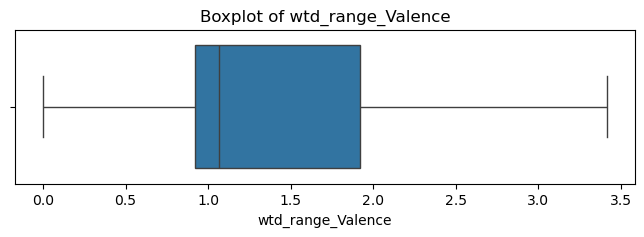

In [98]:
#Checking the outliers for the modified Significant Columns
for col in significant_col:
    plt.figure(figsize=(8, 2))
    sns.boxplot(x=df_capped[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

In [99]:
#Assign the capped dataset to a new dataframe
df1=df_capped

In [100]:
#Find skewness of the features
skew_values = df1.skew(numeric_only=True).sort_values(ascending=False)
print(skew_values)

wtd_range_FusionHeat         4.233614
wtd_range_Density            3.322726
wtd_std_FusionHeat           2.850134
std_FusionHeat               2.822555
wtd_mean_FusionHeat          2.763826
                               ...   
range_atomic_radius         -0.687554
wtd_entropy_Valence         -0.729390
std_atomic_radius           -0.749209
entropy_ElectronAffinity    -0.760388
wtd_entropy_atomic_radius   -0.789187
Length: 82, dtype: float64


In [101]:
#Columns with skewness greater than 1
skewness = df1.skew(numeric_only=True)
highskew_cols = skewness[skewness > 1].index.tolist()
highskew_cols

['wtd_mean_atomic_mass',
 'gmean_atomic_mass',
 'wtd_gmean_atomic_mass',
 'wtd_range_atomic_mass',
 'mean_fie',
 'gmean_fie',
 'wtd_range_atomic_radius',
 'mean_Density',
 'wtd_mean_Density',
 'gmean_Density',
 'wtd_gmean_Density',
 'wtd_range_Density',
 'mean_ElectronAffinity',
 'gmean_ElectronAffinity',
 'mean_FusionHeat',
 'wtd_mean_FusionHeat',
 'gmean_FusionHeat',
 'wtd_gmean_FusionHeat',
 'range_FusionHeat',
 'wtd_range_FusionHeat',
 'std_FusionHeat',
 'wtd_std_FusionHeat',
 'wtd_mean_ThermalConductivity',
 'gmean_ThermalConductivity',
 'wtd_gmean_ThermalConductivity',
 'mean_Valence',
 'gmean_Valence',
 'wtd_gmean_Valence',
 'wtd_range_Valence']

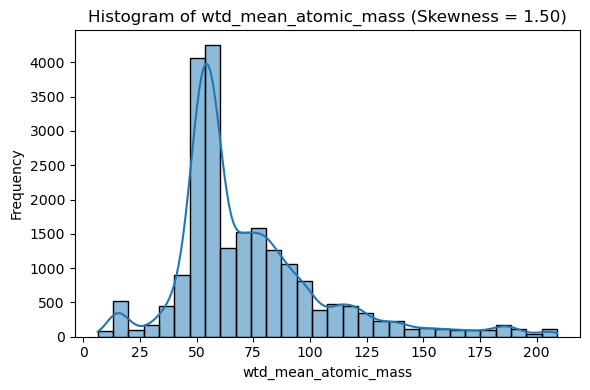

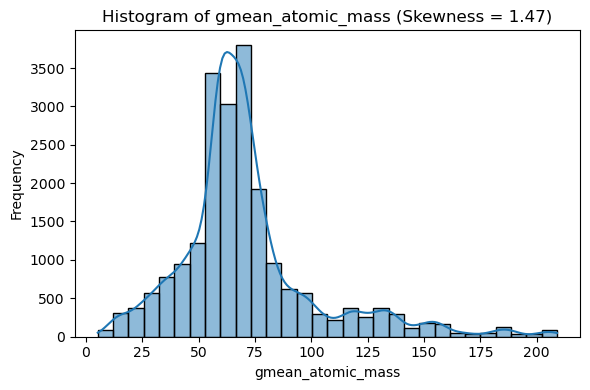

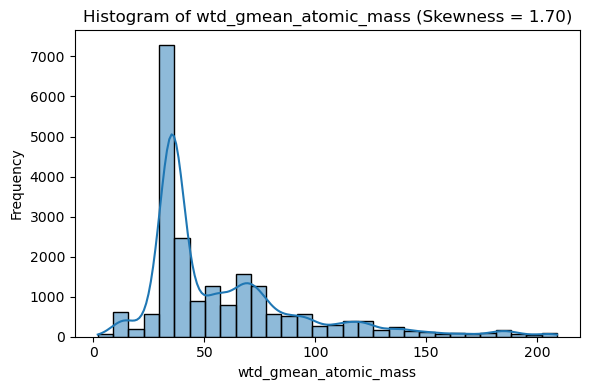

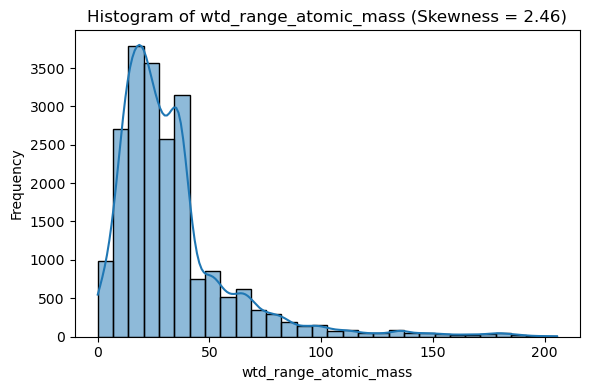

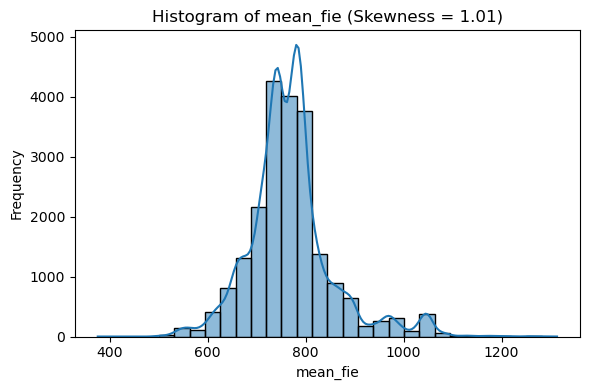

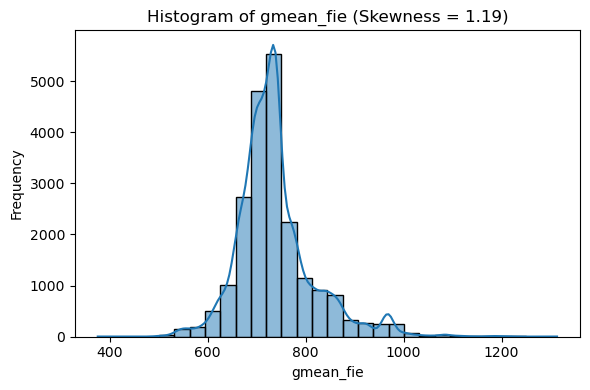

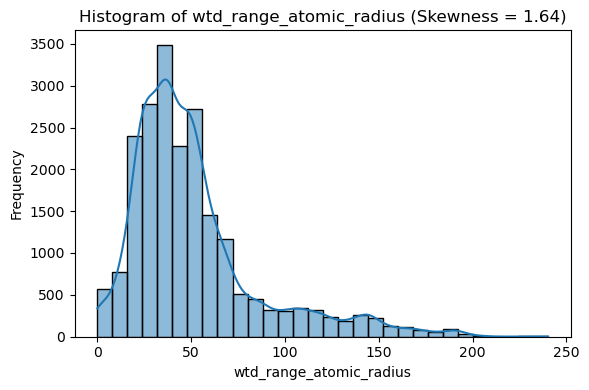

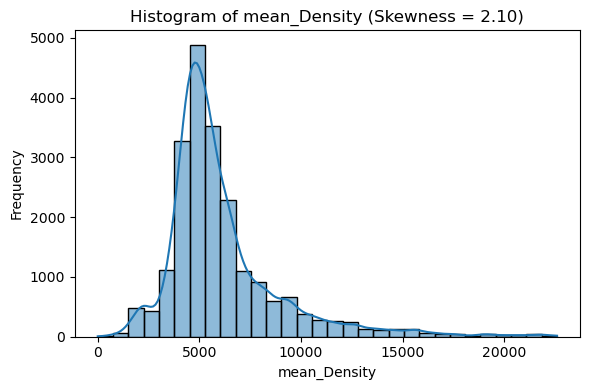

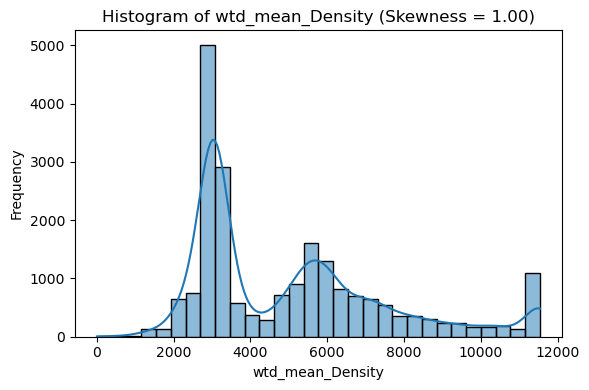

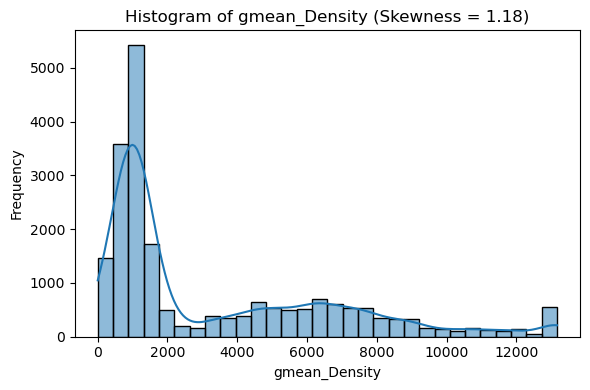

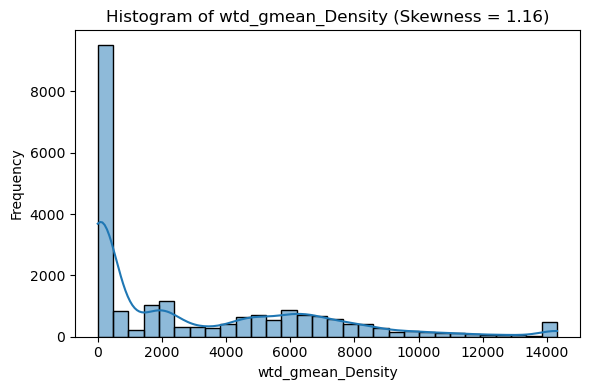

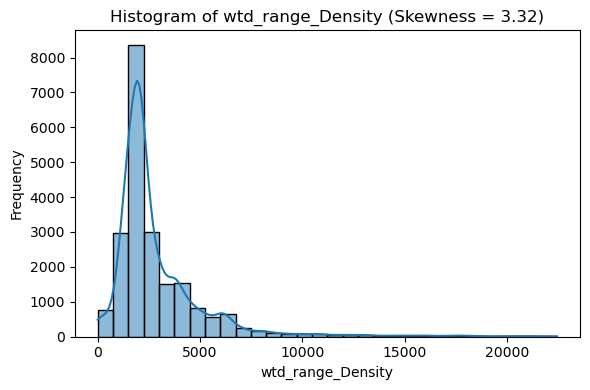

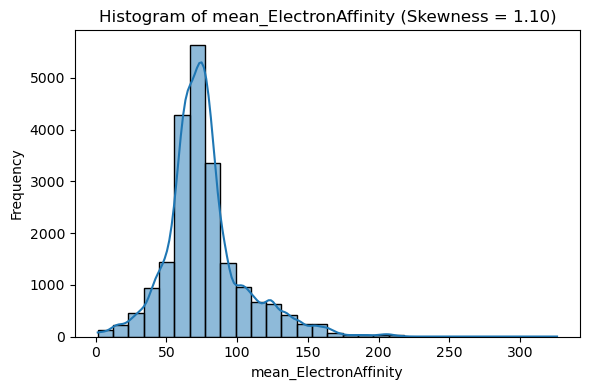

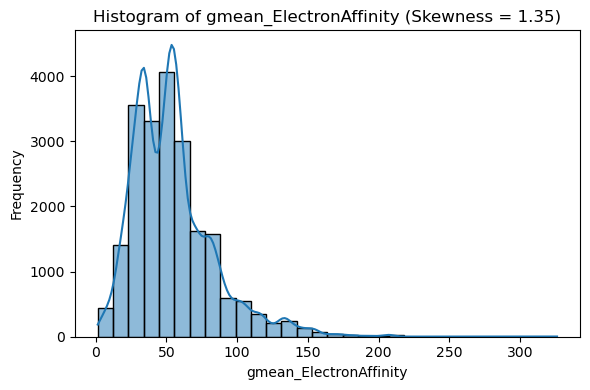

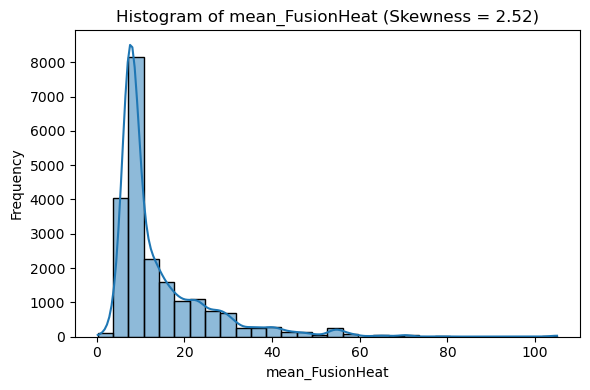

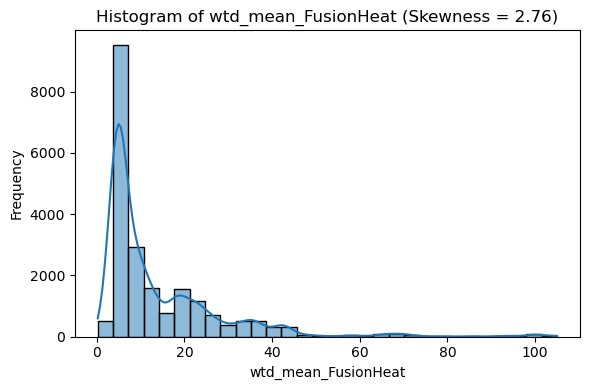

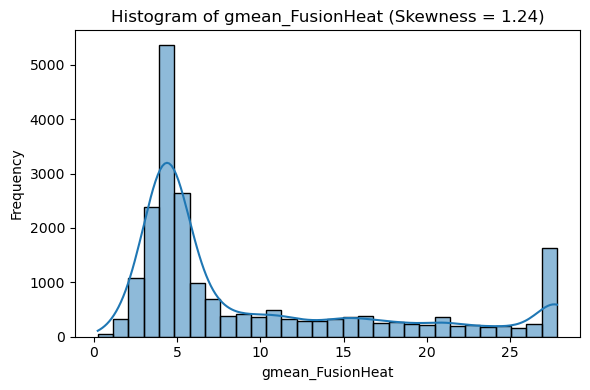

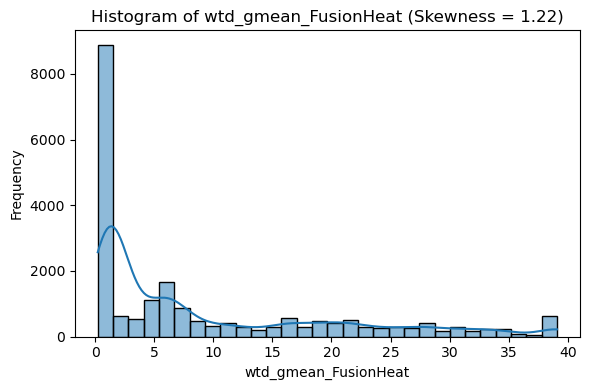

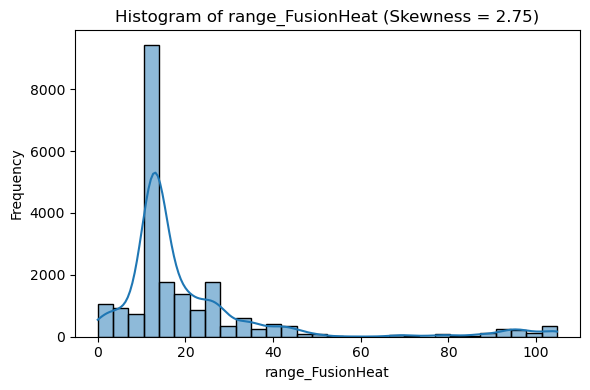

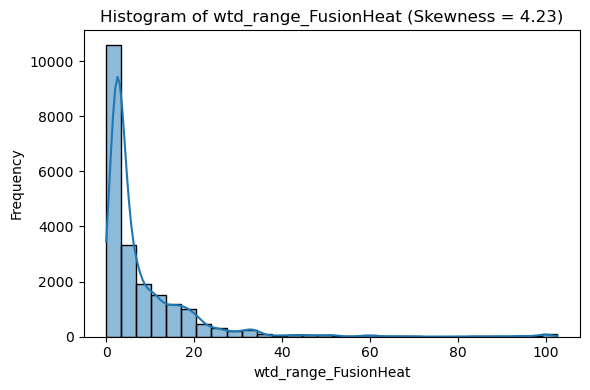

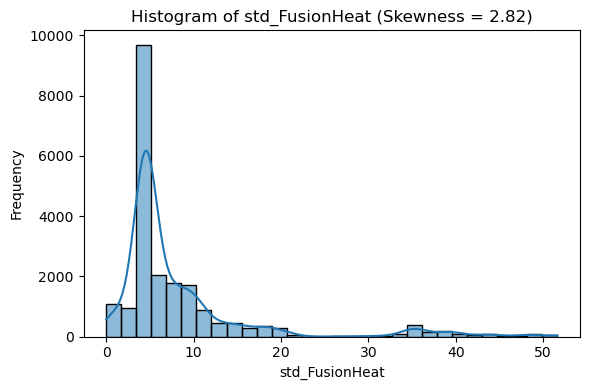

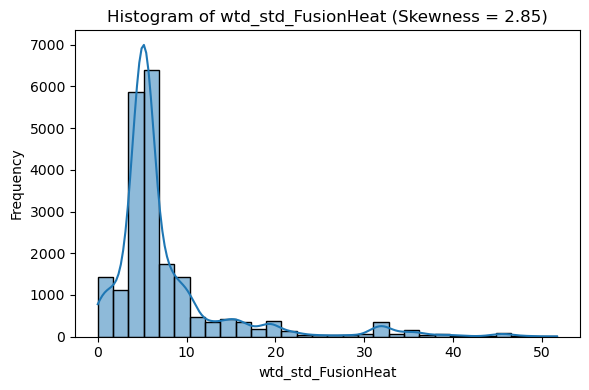

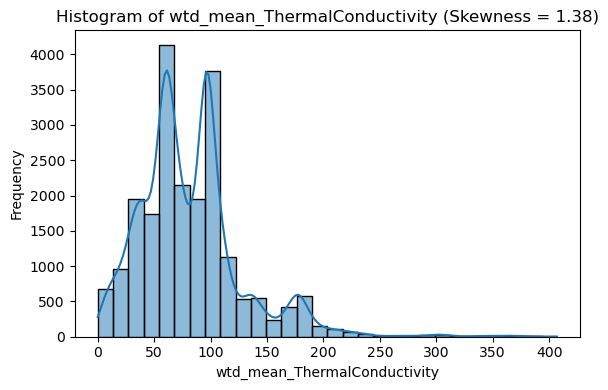

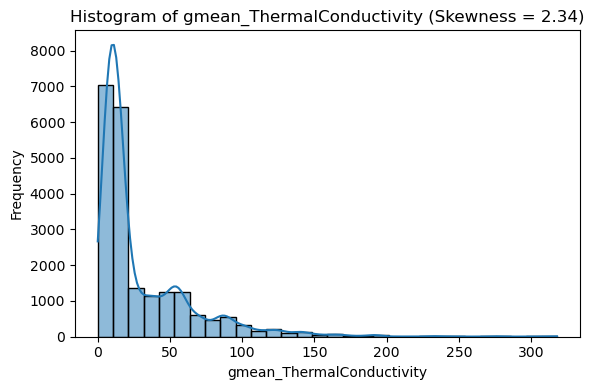

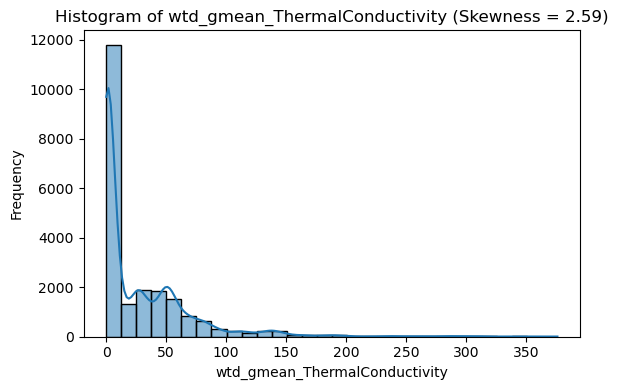

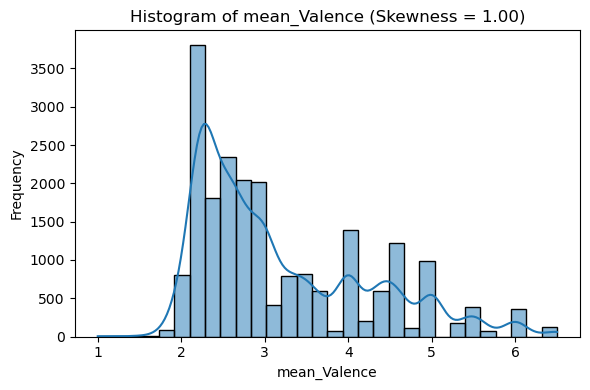

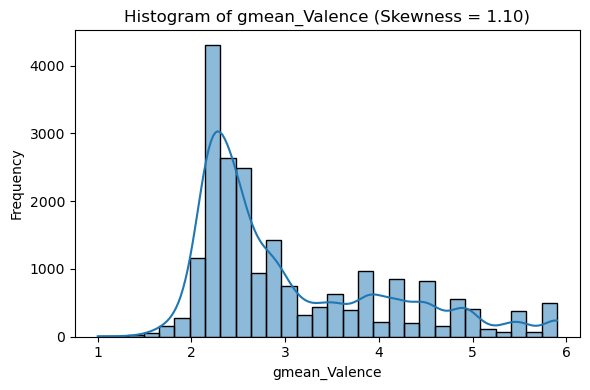

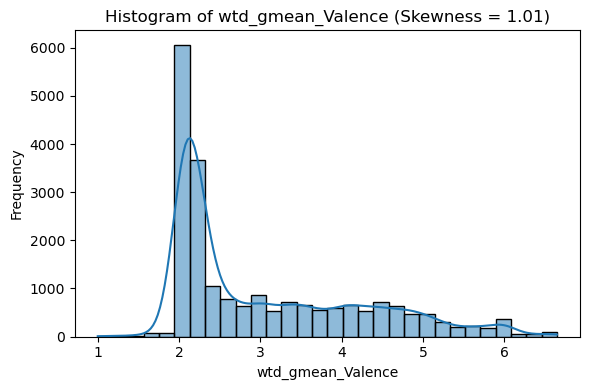

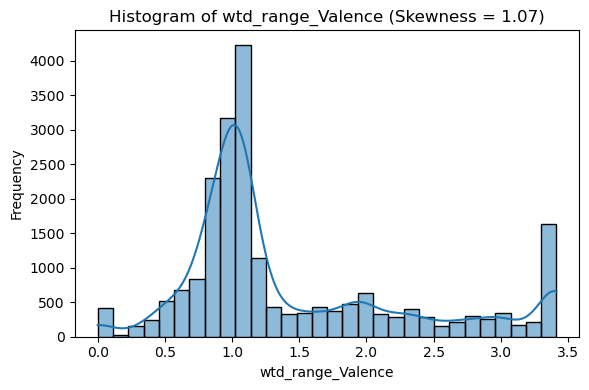

In [102]:
#PLot histograms to view skewness
for col in highskew_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(df1[col], bins=30, kde=True)
    plt.title(f'Histogram of {col} (Skewness = {skewness[col]:.2f})')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

In [103]:
df['critical_temp'].skew()

0.8602232926106779

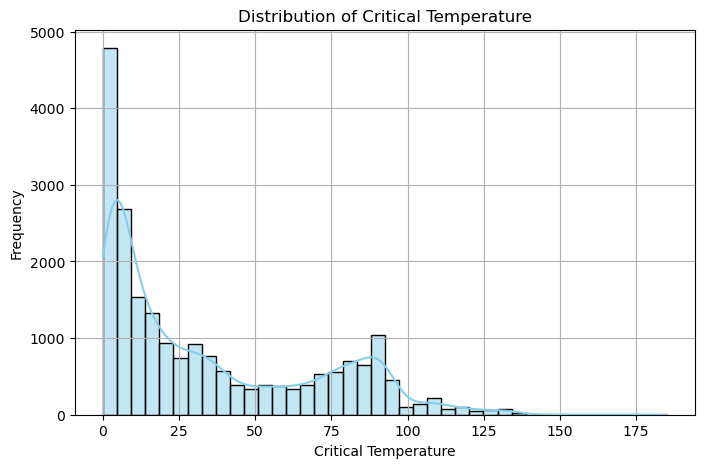

In [104]:
plt.figure(figsize=(8,5))
sns.histplot(df['critical_temp'], kde=True, bins=40, color='skyblue')
plt.title('Distribution of Critical Temperature')
plt.xlabel('Critical Temperature')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

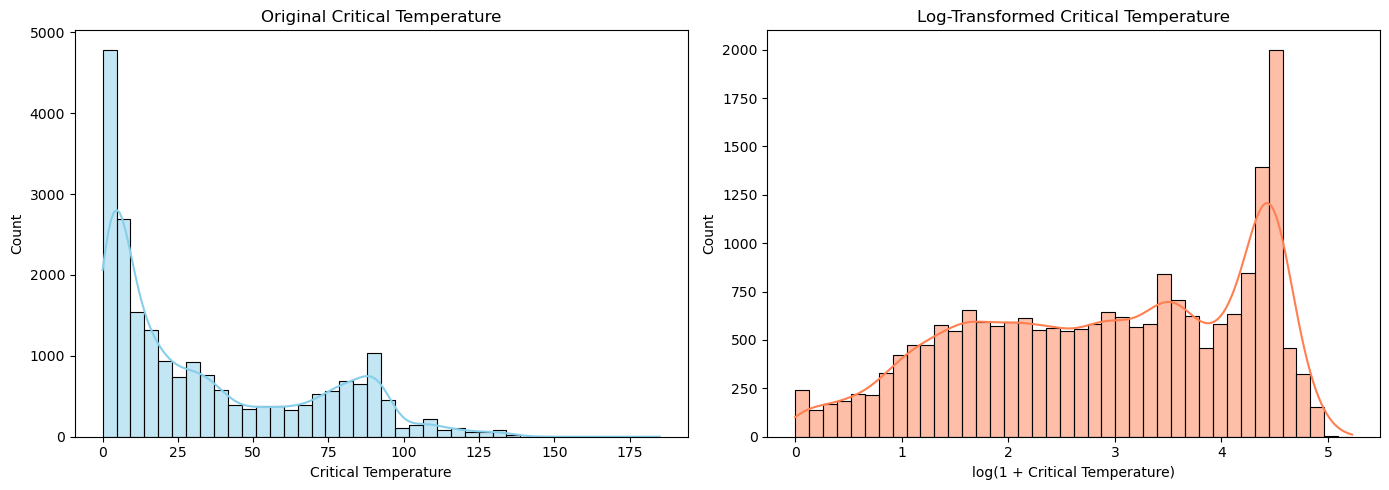

In [105]:
#Comparing log transformed with original critical temperature
# Create log-transformed target
df1['log_critical_temp'] = np.log1p(df1['critical_temp'])  # log(1 + x)
# Plot both distributions
fig, axs = plt.subplots(1, 2, figsize=(14, 5))
# Original
sns.histplot(df1['critical_temp'], kde=True, bins=40, color='skyblue', ax=axs[0])
axs[0].set_title('Original Critical Temperature')
axs[0].set_xlabel('Critical Temperature')
# Log-transformed
sns.histplot(df1['log_critical_temp'], kde=True, bins=40, color='coral', ax=axs[1])
axs[1].set_title('Log-Transformed Critical Temperature')
axs[1].set_xlabel('log(1 + Critical Temperature)')
plt.tight_layout()
fig.savefig('critical_temp_distribution.png', dpi=300)
plt.show()

## End of Phase I

In [107]:
#Loading the algorithms
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [108]:
#Split the dataset into Train/Test
X = df_capped.drop('critical_temp', axis=1)
y = df_capped['critical_temp']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, random_state=42)


In [109]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
print("Linear Regression RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lr)))
print("R² Score:", r2_score(y_test, y_pred_lr))

Linear Regression RMSE: 11.941815214482927
R² Score: 0.8774924652976487
